In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
gdp = pd.read_csv("interpolated_data/gdp.csv")
data = pd.read_csv("interpolated_data/gov_exp_edu.csv")
school_enrollment_sec = pd.read_csv("interpolated_data/school_enrollment_secondary.csv")

In [4]:
data.max()

Unnamed: 0      62.000000
Argentina        5.835398
Australia        6.100000
Austria          6.112340
Azerbaijan       6.873302
                  ...    
Turkiye          4.627740
Uganda           5.103650
Uruguay          4.703260
South Africa     6.604660
Zambia           6.238540
Length: 84, dtype: float64

In [51]:
def data_prep(data_a: pd.DataFrame, data_b: pd.DataFrame):
    # only use countries that are in both tables
    country_list = []
    data_a_keys = data_a.keys()
    data_b_keys = data_b.keys()

    for c in data_a_keys:
        if not c in data_b_keys: continue
        if c == "Unnamed: 0": continue
        country_list.append(c)

    return country_list

def calc_correlation(gdp: list, data: list, data_name: str):
    # let's do that for all countries
    x, y = [], []

    def add_values(c):
        c_gdp = list(gdp.get(c))
        c_data = list(data.get(c))
        # print(c, np.max(c_data))
        
        for i in range(len(c_gdp)):
            if c_gdp[i] == -1 or c_data == -1: continue
            if c_gdp[i] == 0.001 or c_data == 0.001: continue
            else:
                x.append(c_gdp[i])
                y.append(c_data[i])

    country_list = data_prep(gdp, data)
    for c in country_list:
        if c == "Cuba": continue
        add_values(c)

    x = list(np.log(np.array(x)))
    # y = list(np.log(np.array(y)))

    plt.scatter(x, y, s=1)
    plt.xlabel("GDP per capita (current US$) - logarithmic transformed")
    plt.ylabel(data_name)
    plt.show()
    
    out = f"correlation between GDP and {data_name}: {np.corrcoef(np.array(x), np.array(y))[0][1]}"

    return out

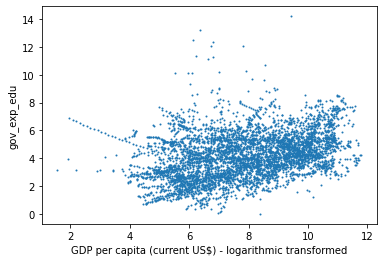

'correlation between GDP and gov_exp_edu: 0.35448882939127335'

In [52]:
calc_correlation(gdp, data, "gov_exp_edu")